In [1]:
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas
import requests
import StringIO

In [3]:
cols = ['WTEQ', 'SNWD', 'PREC', 'TOBS', 'TMAX', 'TMIN', 'TAVG']
# water equivalent, snow depth, precipitation, observed temperature,

In [4]:
colstring = ','.join('{}::value'.format(name) for name in cols)
colstring

'WTEQ::value,SNWD::value,PREC::value,TOBS::value,TMAX::value,TMIN::value,TAVG::value'

In [5]:
fmt = ('http://wcc.sc.egov.usda.gov/reportGenerator/view_csv/'
       'customSingleStationReport/daily/651:OR:SNTL/-{daysback},0/{columns}')

In [6]:
url = fmt.format(columns=colstring, daysback=30)
url

'http://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customSingleStationReport/daily/651:OR:SNTL/-30,0/WTEQ::value,SNWD::value,PREC::value,TOBS::value,TMAX::value,TMIN::value,TAVG::value'

In [7]:
r = requests.get(url)
print(r.text)

# Mt Hood Test Site (651)
# Oregon  SNOTEL Site - 5370 ft
# Daily Data for 2015-12-23 to 2016-01-22
#
# (As of: Fri Jan 22 00:02:02 GMT-08:00 2016)
#  **Provisional data, subject to revision**
#
Date,Snow Water Equivalent (in),Snow Depth (in),Precipitation Accumulation (in),Air Temperature Observed (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),Air Temperature Average (degF)
2015-12-23,18.0,69,48.6,23,24,22,23
2015-12-24,20.6,85,51.2,23,27,20,23
2015-12-25,20.9,83,51.5,21,27,15,21
2015-12-26,20.9,80,51.5,15,28,14,20
2015-12-27,21.1,80,51.7,27,31,23,27
2015-12-28,21.5,81,52.1,28,29,23,26
2015-12-29,21.6,80,52.1,23,28,22,24
2015-12-30,21.8,80,52.1,22,23,16,19
2015-12-31,21.7,78,52.1,16,24,15,20
2016-01-01,21.7,76,52.1,21,31,21,26
2016-01-02,21.5,75,52.1,25,25,14,19
2016-01-03,21.4,75,52.1,14,34,13,23
2016-01-04,21.8,74,52.5,34,36,30,33
2016-01-05,21.8,74,52.5,31,34,30,32
2016-01-06,22.1,74,52.8,30,33,29,30
2016-01-07,22.1,73,52.8,31,33,27,30
2016-01-08,22.2,74,52.9,

In [8]:
df = pandas.read_csv(StringIO.StringIO(r.text), comment='#')
df = df.set_index('Date')
df

,Snow Water Equivalent (in),Snow Depth (in),Precipitation Accumulation (in),Air Temperature Observed (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),Air Temperature Average (degF)
Date,,,,,,,
2015-12-23,18.0,69,48.6,23,24,22,23
2015-12-24,20.6,85,51.2,23,27,20,23
2015-12-25,20.9,83,51.5,21,27,15,21
2015-12-26,20.9,80,51.5,15,28,14,20
2015-12-27,21.1,80,51.7,27,31,23,27
2015-12-28,21.5,81,52.1,28,29,23,26
2015-12-29,21.6,80,52.1,23,28,22,24
2015-12-30,21.8,80,52.1,22,23,16,19
2015-12-31,21.7,78,52.1,16,24,15,20


In [9]:
df.columns

Index([u'Snow Water Equivalent (in)', u'Snow Depth (in)',
       u'Precipitation Accumulation (in)', u'Air Temperature Observed (degF)',
       u'Air Temperature Maximum (degF)', u'Air Temperature Minimum (degF)',
       u'Air Temperature Average (degF)'],
      dtype='object')

In [10]:
df[u'Snow Water Equivalent (in)']

Date
2015-12-22     9.5
2015-12-23     9.7
2015-12-24     9.9
2015-12-25     9.9
2015-12-26     9.9
2015-12-27     9.9
2015-12-28    10.0
2015-12-29    10.1
2015-12-30    10.0
2015-12-31    10.0
2016-01-01    10.0
2016-01-02    10.0
2016-01-03    10.0
2016-01-04    10.3
2016-01-05    10.4
2016-01-06    10.5
2016-01-07    10.6
2016-01-08    10.6
2016-01-09    10.6
2016-01-10    10.5
2016-01-11    10.5
2016-01-12    10.6
2016-01-13    10.7
2016-01-14    11.0
2016-01-15    11.0
2016-01-16    11.1
2016-01-17    11.4
2016-01-18    11.7
2016-01-19    11.8
2016-01-20     NaN
2016-01-21    12.2
Name: Snow Water Equivalent (in), dtype: float64

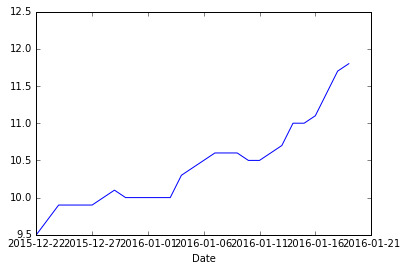

In [11]:
_.plot()